In [1]:
import pandas as pd

df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df = df[['type', 'duration', 'listed_in', 'country']]


In [3]:
df.dropna(inplace=True)


In [4]:
def convert_duration(x):
    if 'min' in x:
        return int(x.replace('min', '').strip())
    elif 'Season' in x:
        return int(x.split(' ')[0]) * 60  # Approximate 1 season = 60 min
    else:
        return 0

df['duration_mins'] = df['duration'].apply(convert_duration)


In [5]:
df[['duration', 'duration_mins']].head()


,duration,duration_mins
0,90 min,90
1,2 Seasons,120
4,2 Seasons,120
7,125 min,125
8,9 Seasons,540


In [6]:
df['type'] = df['type'].map({'Movie': 0, 'TV Show': 1})


In [7]:
from sklearn.preprocessing import LabelEncoder

le_country = LabelEncoder()
le_genre = LabelEncoder()

df['country_encoded'] = le_country.fit_transform(df['country'])
df['genre_encoded'] = le_genre.fit_transform(df['listed_in'])


In [8]:
X = df[['duration_mins', 'country_encoded', 'genre_encoded']]  # features
y = df['type']  # label


In [9]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [11]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Model Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.74      0.98      0.85      1137
           1       0.77      0.16      0.26       458

    accuracy                           0.74      1595
   macro avg       0.75      0.57      0.55      1595
weighted avg       0.75      0.74      0.68      1595



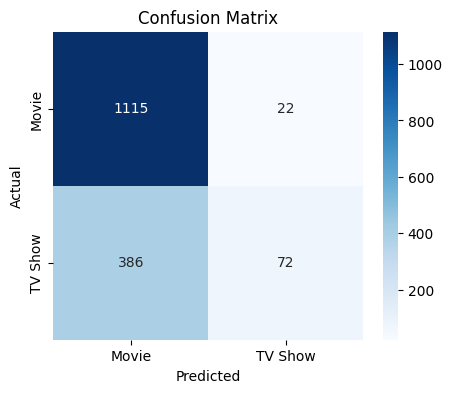

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
